In [109]:
# Filtering out the warnings
import warnings
warnings.filterwarnings('ignore')

In [110]:
# Importing the required libraries
# This notebook runs on pandas version 1.1.3

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# <font color = blue> EDA Case Study - Risk Analysis for Bank </font>

The loan providing companies find it hard to give loans to the people due to their insufficient or non-existent credit history. Because of that, some consumers use it as their advantage by becoming a defaulter. Suppose you work for a consumer finance company which specialises in lending various types of loans to urban customers. You have to use EDA to analyse the patterns present in the data. This will ensure that the applicants capable of repaying the loan are not rejected.

When the company receives a loan application, the company has to decide for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

1. If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company

2. If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company.

##  Task 1: Reading the data

- ### Subtask 1.1: Reading the previous_application Data.

Read the previous_application data file provided and storing in a dataframe `prev_application'

In [156]:
# Reading the csv file using 'read_csv'
prev_application = pd.read_csv('previous_application.csv')
pd.set_option("display.max_columns", None)
prev_application.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


- ###  Subtask 1.2: Inspecting the Dataframe

Inspecting the dataframe for dimensions, null-values, and summary of different numeric columnns

In [157]:
# Checking the number of rows and columns in the dataframe - prev_application
prev_application.shape

(1670214, 37)

In [159]:
# Checking the column-wise info of prev_application to check for amount of null values & data-types 
prev_application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [160]:
# Checking the statistical information of numerical columns of the dataframe - prev_application
prev_application.describe().apply(lambda s: s.apply('{0:.5f}'.format))

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1670214.00000,1670214.00000,1297979.00000,1670214.00000,1670213.00000,774370.00000,1284699.00000,1670214.00000,1670214.00000,774370.00000,5951.00000,5951.00000,1670214.00000,1670214.00000,1297984.00000,997149.00000,997149.00000,997149.00000,997149.00000,997149.00000,997149.00000
mean,1923089.13533,278357.17410,15955.12066,175233.86036,196114.02122,6697.40214,227847.27928,12.48418,0.99647,0.07964,0.18836,0.77350,-880.67967,313.95112,16.05408,342209.85504,13826.26934,33767.77405,76582.40306,81992.34384,0.33257
std,532597.95870,102814.82385,14782.13733,292779.76239,318574.61655,20921.49541,315396.55794,3.33403,0.05933,0.10782,0.08767,0.10088,779.09967,7127.44346,14.56729,88916.11583,72444.86971,106857.03479,149647.41512,153303.51673,0.47113
min,1000001.00000,100001.00000,0.00000,0.00000,0.00000,-0.90000,0.00000,0.00000,0.00000,-0.00001,0.03478,0.37315,-2922.00000,-1.00000,0.00000,-2922.00000,-2892.00000,-2801.00000,-2889.00000,-2874.00000,0.00000
25%,1461857.25000,189329.00000,6321.78000,18720.00000,24160.50000,0.00000,50841.00000,10.00000,1.00000,0.00000,0.16072,0.71564,-1300.00000,-1.00000,6.00000,365243.00000,-1628.00000,-1242.00000,-1314.00000,-1270.00000,0.00000
50%,1923110.50000,278714.50000,11250.00000,71046.00000,80541.00000,1638.00000,112320.00000,12.00000,1.00000,0.05161,0.18912,0.83510,-581.00000,3.00000,12.00000,365243.00000,-831.00000,-361.00000,-537.00000,-499.00000,0.00000
75%,2384279.75000,367514.00000,20658.42000,180360.00000,216418.50000,7740.00000,234000.00000,15.00000,1.00000,0.10891,0.19333,0.85254,-280.00000,82.00000,24.00000,365243.00000,-411.00000,129.00000,-74.00000,-44.00000,1.00000
max,2845382.00000,456255.00000,418058.14500,6905160.00000,6905160.00000,3060045.00000,6905160.00000,23.00000,1.00000,1.00000,1.00000,1.00000,-1.00000,4000000.00000,84.00000,365243.00000,365243.00000,365243.00000,365243.00000,365243.00000,1.00000


- ### Subtask 1.3: Analysing the previous_application Data for Missing Value Treatment

After interpreting the previous_application dataset, it is time to identify missing values in relevant columns and treat them for further analysis

In [117]:
#creating a dataframe to find number & percent of null values in each column within prev_application dataframe
def assess_NA(data):
    """
    Returns a pandas dataframe denoting the total number of NA values and the percentage of NA values in each column.
    The column names are noted on the index.
    
    Parameters
    ----------
    data: dataframe
    """
    # pandas series denoting features and the sum of their null values
    null_sum = data.isnull().sum()# instantiate columns for missing data
    total = null_sum.sort_values(ascending=False)
    percent = ( ((null_sum / len(data.index))*100).round(2) ).sort_values(ascending=False)
    
    # concatenate along the columns to create the complete dataframe
    df_NA = pd.concat([total, percent], axis=1, keys=['Number of NA', 'Percent NA'])
    
    # drop rows that don't have any missing data; omit if you want to keep all rows
    df_NA = df_NA[ (df_NA.T != 0).any() ]
    
    return df_NA

df_NA = assess_NA(prev_application)
df_NA

,Number of NA,Percent NA
RATE_INTEREST_PRIVILEGED,1664263,99.64
RATE_INTEREST_PRIMARY,1664263,99.64
RATE_DOWN_PAYMENT,895844,53.64
AMT_DOWN_PAYMENT,895844,53.64
NAME_TYPE_SUITE,820405,49.12
DAYS_TERMINATION,673065,40.30
NFLAG_INSURED_ON_APPROVAL,673065,40.30
DAYS_FIRST_DRAWING,673065,40.30
DAYS_FIRST_DUE,673065,40.30
DAYS_LAST_DUE_1ST_VERSION,673065,40.30


In [118]:
# subsetting the above dataframe for only columns with missing value% greater than 41% 
# 41% is considered for filteration to retain other relevant columns having lesser % of missing values
df_High_NA=  df_NA[df_NA['Percent NA'] > 41]
print(len(df_High_NA), 'Columns with High missing Data')
df_High_NA

5 Columns with High missing Data


,Number of NA,Percent NA
RATE_INTEREST_PRIVILEGED,1664263,99.64
RATE_INTEREST_PRIMARY,1664263,99.64
RATE_DOWN_PAYMENT,895844,53.64
AMT_DOWN_PAYMENT,895844,53.64
NAME_TYPE_SUITE,820405,49.12


#### As seen here, these 5 columns have really high percentage of missing values, hence we will drop them out from further analysis. 

In [119]:
#Removing columns having null values above 41% from prev_application dataframe
# We shall perform missing value treatment on the remaining columns
def dropHNullsCols(dataframe,percent):
    df = dataframe.copy()
    in_shape = df.shape
    colnames = (df.isnull().sum()/len(df))
    colnames = list(colnames[colnames.values>=percent].index)
    df.drop(labels = colnames,axis =1,inplace=True)        
    print("Number of Columns dropped: ",len(colnames))    
    print("\nOld dataset Shape:",in_shape,"\nNew dataset Shape:",df.shape)
    return df
prev_application = dropHNullsCols(prev_application,0.41)

Number of Columns dropped:  5

Old dataset Shape: (1670214, 37) 
New dataset Shape: (1670214, 32)


In [120]:
#list of columns in prev_application dataframe now having missing values. 
#We shall now start missing value treatment on these
prev_application.columns[prev_application.isnull().any()]

Index(['AMT_ANNUITY', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'CNT_PAYMENT',
       'PRODUCT_COMBINATION', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE',
       'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION',
       'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

#### Handling missing values of AMT_ANNUITY column now: 

<AxesSubplot:xlabel='AMT_ANNUITY'>

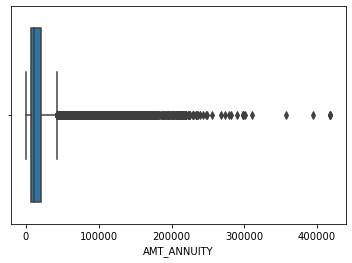

In [121]:
#Plotting a boxplot for AMT_ANNUITY column
sns.boxplot(prev_application.AMT_ANNUITY)

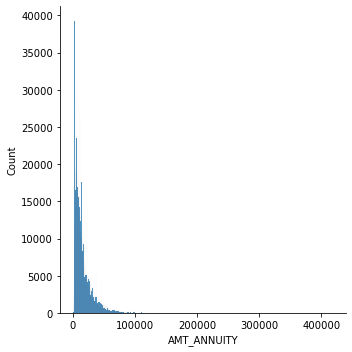

In [122]:
sns.displot(prev_application, x="AMT_ANNUITY")

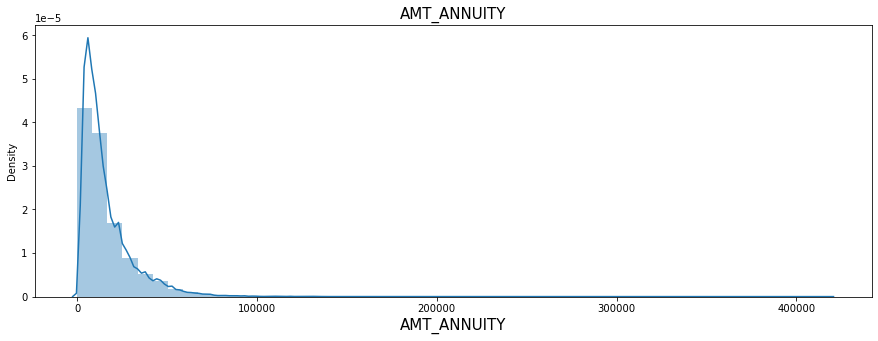

In [123]:
plt.figure(figsize=[15,5])
r = sns.distplot(prev_application['AMT_ANNUITY'])
r.axes.set_title('AMT_ANNUITY', fontsize=15)
r.set_xlabel('AMT_ANNUITY',fontsize=15)
plt.show()

In [124]:
#AMT_ANNUITY is a numerical column with float type values and has 22.29% null values. 
#Also, as there are a lot of outliers, finding the median value for this column for value imputation
median = prev_application['AMT_ANNUITY'].median()
mode = prev_application['AMT_ANNUITY'].mode()
print([median, mode])

[11250.0, 0    2250.0
dtype: float64]


In [125]:
#replacing all Null values in AMT_ANNUITY with median value of 11250
prev_application['AMT_ANNUITY'] = prev_application['AMT_ANNUITY'].fillna( prev_application['AMT_ANNUITY'].median() )

#### Handling missing values of AMT_GOODS_PRICE column now: 

<AxesSubplot:xlabel='AMT_GOODS_PRICE'>

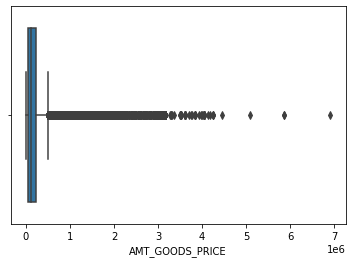

In [126]:
#Plotting a boxplot for AMT_GOODS_PRICE column
sns.boxplot(prev_application.AMT_GOODS_PRICE)

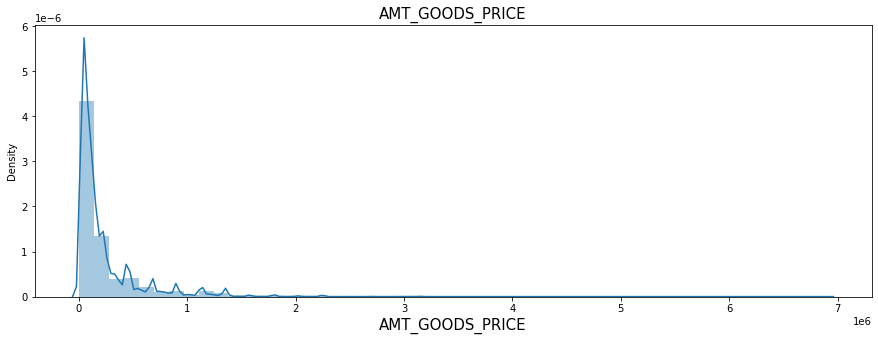

In [127]:
plt.figure(figsize=[15,5])
r = sns.distplot(prev_application['AMT_GOODS_PRICE'])
r.axes.set_title('AMT_GOODS_PRICE', fontsize=15)
r.set_xlabel('AMT_GOODS_PRICE',fontsize=15)
plt.show()

In [128]:
#AMT_GOODS_PRICE is a numerical column with float type values and has 23.8% null values. 
#Also, as there are a lot of outliers, finding the median value for this column for value imputation
median_goods_price = prev_application['AMT_GOODS_PRICE'].median()
mean_goods_price = prev_application['AMT_GOODS_PRICE'].mean()
mode_goods_price = prev_application.mode()['AMT_GOODS_PRICE'][0]
print([median_goods_price, mean_goods_price, mode_goods_price])

[112320.0, 227847.27928334344, 45000.0]


In [129]:
#replacing all Null values in AMT_GOODS_PRICE with median value of 112320
prev_application['AMT_GOODS_PRICE'] = prev_application['AMT_GOODS_PRICE'].fillna( prev_application['AMT_GOODS_PRICE'].median() )

#### Handling missing values of CNT_PAYMENT column now: 

In [130]:
#CNT_PAYMENT is a numerical column with float type values and has 22.29% null values. 
#Also, as there are a lot of outliers, finding the median value for this column for value imputation
median_cnt_payment = prev_application['CNT_PAYMENT'].median()
mean_cnt_payment = prev_application['CNT_PAYMENT'].mean()
mode_cnt_payment = prev_application.mode()['CNT_PAYMENT'][0]
print([median_cnt_payment, mean_cnt_payment, mode_cnt_payment])

[12.0, 16.0540815603274, 12.0]


#### As observed the median & mode values of 'CNT_PAYMENT' column are same, hence we will impute all missing values in this column with the median i.e. 12

In [131]:
#replacing all Null values in 'CNT_PAYMENT' with median value of 12
prev_application['CNT_PAYMENT'] = prev_application['CNT_PAYMENT'].fillna( prev_application['CNT_PAYMENT'].median() )

#### Handling missing values of PRODUCT_COMBINATION column now: 

In [132]:
prev_application['PRODUCT_COMBINATION'] = prev_application['PRODUCT_COMBINATION'].astype('str')

In [133]:
#PRODUCT_COMBINATION is a categorical column with only 0.02% missing values - We will replace these with the mode of this column.
#This attribute can be useful for further analysis, hence we will impute values & retain it
mode_prod_comb = prev_application.mode()['PRODUCT_COMBINATION'][0]
print([mode_prod_comb])

['Cash']


In [134]:
prev_application['PRODUCT_COMBINATION'].value_counts(ascending = False)

Cash                              285990
POS household with interest       263622
POS mobile with interest          220670
Cash X-Sell: middle               143883
Cash X-Sell: low                  130248
Card Street                       112582
POS industry with interest         98833
POS household without interest     82908
Card X-Sell                        80582
Cash Street: high                  59639
Cash X-Sell: high                  59301
Cash Street: middle                34658
Cash Street: low                   33834
POS mobile without interest        24082
POS other with interest            23879
POS industry without interest      12602
POS others without interest         2555
nan                                  346
Name: PRODUCT_COMBINATION, dtype: int64

<AxesSubplot:>

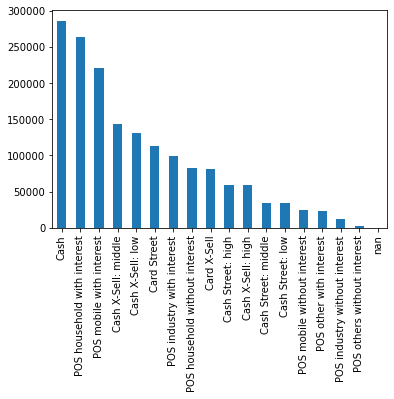

In [135]:
# barplot for PRODUCT_COMBINATION
prev_application['PRODUCT_COMBINATION'].value_counts(ascending = False).plot(kind='bar')

#### As seen, 'Cash' is the highest occuring product_combination value, hence we will replace the 346 missing records, with 'Cash'

In [136]:
#replacing all Null values in 'PRODUCT_COMBINATION' with mode 'Cash'
prev_application['PRODUCT_COMBINATION'] = prev_application['PRODUCT_COMBINATION'].fillna( prev_application['PRODUCT_COMBINATION'].mode() )

#### Handling missing values of DAYS_FIRST_DRAWING column now: 

In [137]:
#DAYS_FIRST_DRAWING is a numerical column with float type values and has 40.03% null values. 
median_day_first_drawing = prev_application['DAYS_FIRST_DRAWING'].median()
mean_day_first_drawing = prev_application['DAYS_FIRST_DRAWING'].mean()
mode_day_first_drawing = prev_application.mode()['DAYS_FIRST_DRAWING'][0]
print([median_day_first_drawing, mean_day_first_drawing, mode_day_first_drawing])

[365243.0, 342209.85503871535, 365243.0]


#### As seen, the median & mode values are the same for Days_First_Drawing column are the same, hence we will replace the missing values with the median value - 365243

In [138]:
#replacing all Null values in 'DAYS_FIRST_DRAWING' with median 365243
prev_application['DAYS_FIRST_DRAWING'] = prev_application['DAYS_FIRST_DRAWING'].fillna( prev_application['DAYS_FIRST_DRAWING'].median() )

#### Handling missing values of DAYS_FIRST_DUE column now: 

###### This column specifies the difference betweent the date of current application & the supposed date of first due of the previous application


<AxesSubplot:xlabel='DAYS_FIRST_DUE'>

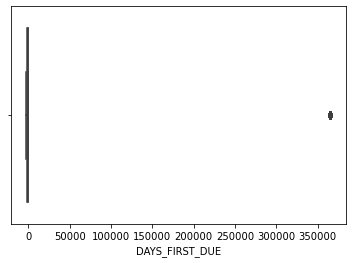

In [139]:
#Plotting a boxplot for DAYS_FIRST_DUE column
sns.boxplot(prev_application.DAYS_FIRST_DUE)

In [140]:
#DAYS_FIRST_DUE is a numerical column with float type values and has 40.30% null values. 
median_days_first_due = prev_application['DAYS_FIRST_DUE'].median()
mean_days_first_due = prev_application['DAYS_FIRST_DUE'].mean()
print([median_days_first_due, mean_days_first_due])

[-831.0, 13826.269336879443]


#### As seen, the mean and median are very different, which can be accounted due to the presence of outliers leading to imbalance in the mean value. Since, this column can be useful in further analysis, we will replace missing values with the median value

In [141]:
#replacing all Null values in 'DAYS_FIRST_DUE' with median 365243
prev_application['DAYS_FIRST_DUE'] = prev_application['DAYS_FIRST_DUE'].fillna( prev_application['DAYS_FIRST_DUE'].median() )

#### Handling missing values of DAYS_LAST_DUE_1ST_VERSION column now: 

###### This column specifies the difference between the date of current application & the actual date of first due of the previous application


<AxesSubplot:xlabel='DAYS_LAST_DUE_1ST_VERSION'>

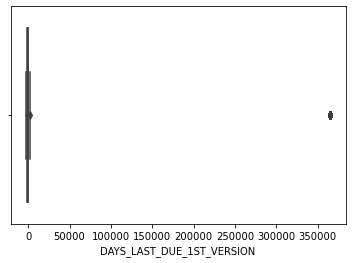

In [142]:
#Plotting a boxplot for DAYS_LAST_DUE_1ST_VERSION column
sns.boxplot(prev_application.DAYS_LAST_DUE_1ST_VERSION)

In [143]:
#DAYS_LAST_DUE_1ST_VERSION is a numerical column with float type values and has 40.30% null values. 
median_days_last_due_1st = prev_application['DAYS_LAST_DUE_1ST_VERSION'].median()
mean_days_last_due_1st = prev_application['DAYS_LAST_DUE_1ST_VERSION'].mean()
print([median_days_last_due_1st, mean_days_last_due_1st])

[-361.0, 33767.77405382746]


#### As seen, the mean and median are very different, which can be accounted due to the presence of outliers leading to imbalance in the mean value. Since, this column can be useful in further analysis, we will replace missing values with the median value

In [144]:
#replacing all Null values in 'DAYS_LAST_DUE_1ST_VERSION' with median -361
prev_application['DAYS_LAST_DUE_1ST_VERSION'] = prev_application['DAYS_LAST_DUE_1ST_VERSION'].fillna( prev_application['DAYS_LAST_DUE_1ST_VERSION'].median() )

#### Handling missing values of DAYS_LAST_DUE column now: 

###### This column specifies the difference between the date of current application & the actual date of last due of the previous application


<AxesSubplot:xlabel='DAYS_LAST_DUE'>

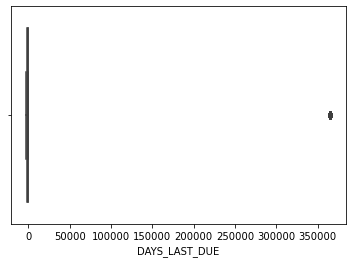

In [145]:
#Plotting a boxplot for DAYS_LAST_DUE column
sns.boxplot(prev_application.DAYS_LAST_DUE)

In [146]:
#DAYS_LAST_DUE is a numerical column with float type values and has 40.30% null values. 
median_days_last_due = prev_application['DAYS_LAST_DUE'].median()
mean_days_last_due = prev_application['DAYS_LAST_DUE'].mean()
print([median_days_last_due, mean_days_last_due])

[-537.0, 76582.40306413585]


#### As seen, the mean and median are very different, which can be accounted due to the presence of outliers leading to imbalance in the mean value. Since, this column can be useful in further analysis, we will replace missing values with the median value

In [147]:
#replacing all Null values in 'DAYS_LAST_DUE' with median -537
prev_application['DAYS_LAST_DUE'] = prev_application['DAYS_LAST_DUE'].fillna( prev_application['DAYS_LAST_DUE'].median() )

#### Handling missing values of DAYS_TERMINATION column now: 

###### This column specifies the difference between the date of current application & the expected date of termination of previous application


<AxesSubplot:xlabel='DAYS_TERMINATION'>

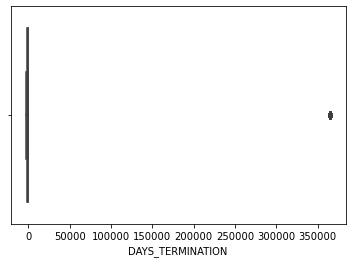

In [148]:
#Plotting a boxplot for DAYS_TERMINATION column
sns.boxplot(prev_application.DAYS_TERMINATION)

In [149]:
#DAYS_TERMINATION is a numerical column with float type values and has 40.30% null values. 
median_days_termination = prev_application['DAYS_TERMINATION'].median()
mean_days_termination = prev_application['DAYS_TERMINATION'].mean()
print([median_days_termination, mean_days_termination])

[-499.0, 81992.34383828295]


#### As seen, the mean and median are very different, which can be accounted due to the presence of outliers leading to imbalance in the mean value. Since, this column can be useful in further analysis, we will replace missing values with the median value

In [150]:
#replacing all Null values in 'DAYS_TERMINATION' with median -499
prev_application['DAYS_TERMINATION'] = prev_application['DAYS_TERMINATION'].fillna( prev_application['DAYS_TERMINATION'].median() )

#### Handling missing values of NFLAG_INSURED_ON_APPROVAL column now: 

###### This column specifies if the client requested application during the previous application

In [151]:
prev_application['NFLAG_INSURED_ON_APPROVAL'] = prev_application['NFLAG_INSURED_ON_APPROVAL'].astype('str') 

In [152]:
#NFLAG_INSURED_ON_APPROVAL is a categorical column with float type values and has 40.30% null values. 
median_nflag = prev_application['NFLAG_INSURED_ON_APPROVAL'].median()
mode_nflag = prev_application['NFLAG_INSURED_ON_APPROVAL'].mode()[0]
print([mode_nflag, median_nflag])

['nan', 0.0]


In [153]:
#replacing all Null values in 'NFLAG_INSURED_ON_APPROVAL' with mode - 0
prev_application['NFLAG_INSURED_ON_APPROVAL'] = prev_application['NFLAG_INSURED_ON_APPROVAL'].fillna( prev_application['NFLAG_INSURED_ON_APPROVAL'].mode() )

In [154]:
#list of columns in prev_application dataframe having null values. We shall now start missing value treatment on these.
prev_application.columns[prev_application.isnull().any()]

Index(['AMT_CREDIT'], dtype='object')

In [ ]:
prev_application.dropna(subset = ["AMT_CREDIT"], inplace=True)

- ### Subtask 2.1: Reading the application Data.

Reading the application data file provided and storing in a dataframe `application'

In [163]:
# Reading the csv file using 'read_csv'
application = pd.read_csv('application_data.csv')
pd.set_option("display.max_columns", None)
application.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,